In [16]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as ocm

In [19]:
#load grid
file_path = os.path.join(os.environ.get('prodir'),'waom10_stable_grd.nc')
grd= xr.open_dataset(file_path)
#file_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_v2.0_frc','waom10_grd.nc')
#grid_large= xr.open_dataset(file_path)

In [22]:
#plot
def plot_topo(grid):
    plt.close()
    fig, ax = plt.subplots(1,figsize=(15,8))
    #plt.suptitle('Bathymery, coastline and ice front')
    grid.h.plot(cmap=ocm.deep,ax=ax)
    grid.mask_rho.plot.contour(ax=ax)
    grid.zice.where((grid.h+grid.zice)>20).plot.contour(levels=[-0.1],ax=ax)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

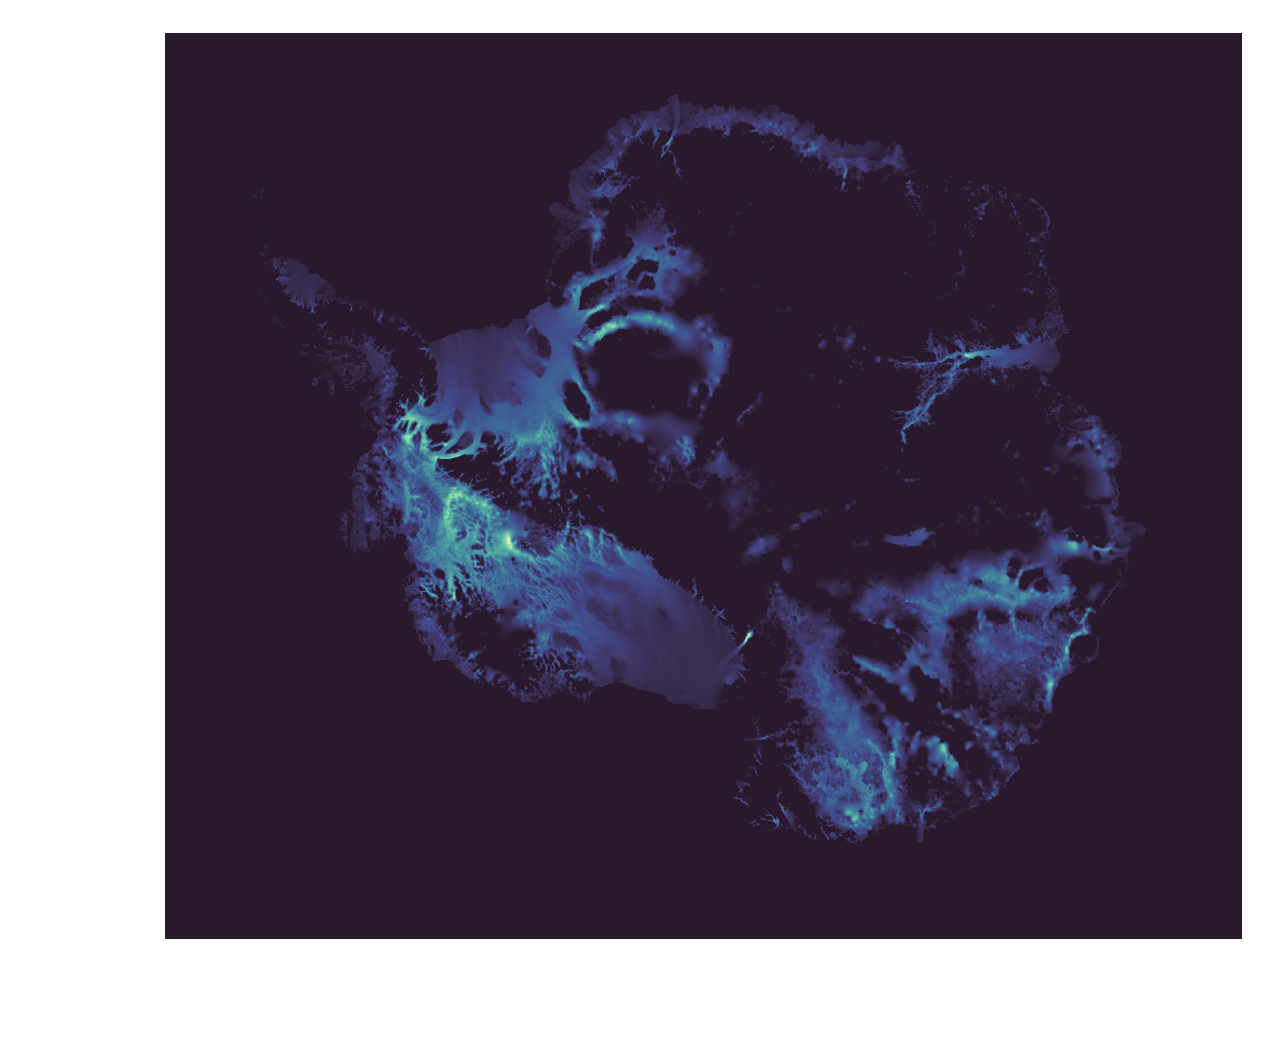

In [14]:
plt.close()
fig, ax = plt.subplots(1,dpi=300)
#plt.suptitle('Bathymery, coastline and ice front')
plt.pcolormesh(grd.zice.values,cmap=ocm.deep)
#grd.mask_rho.plot.contour(ax=ax)
#grd.zice.where((grd.h+grd.zice)>20).plot.contour(levels=[-0.1],ax=ax)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

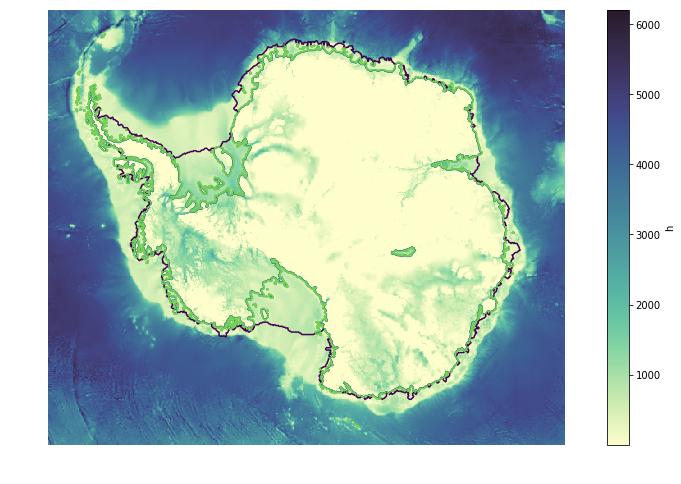

In [23]:
plot_topo(grid_small)

<IPython.core.display.Javascript object>


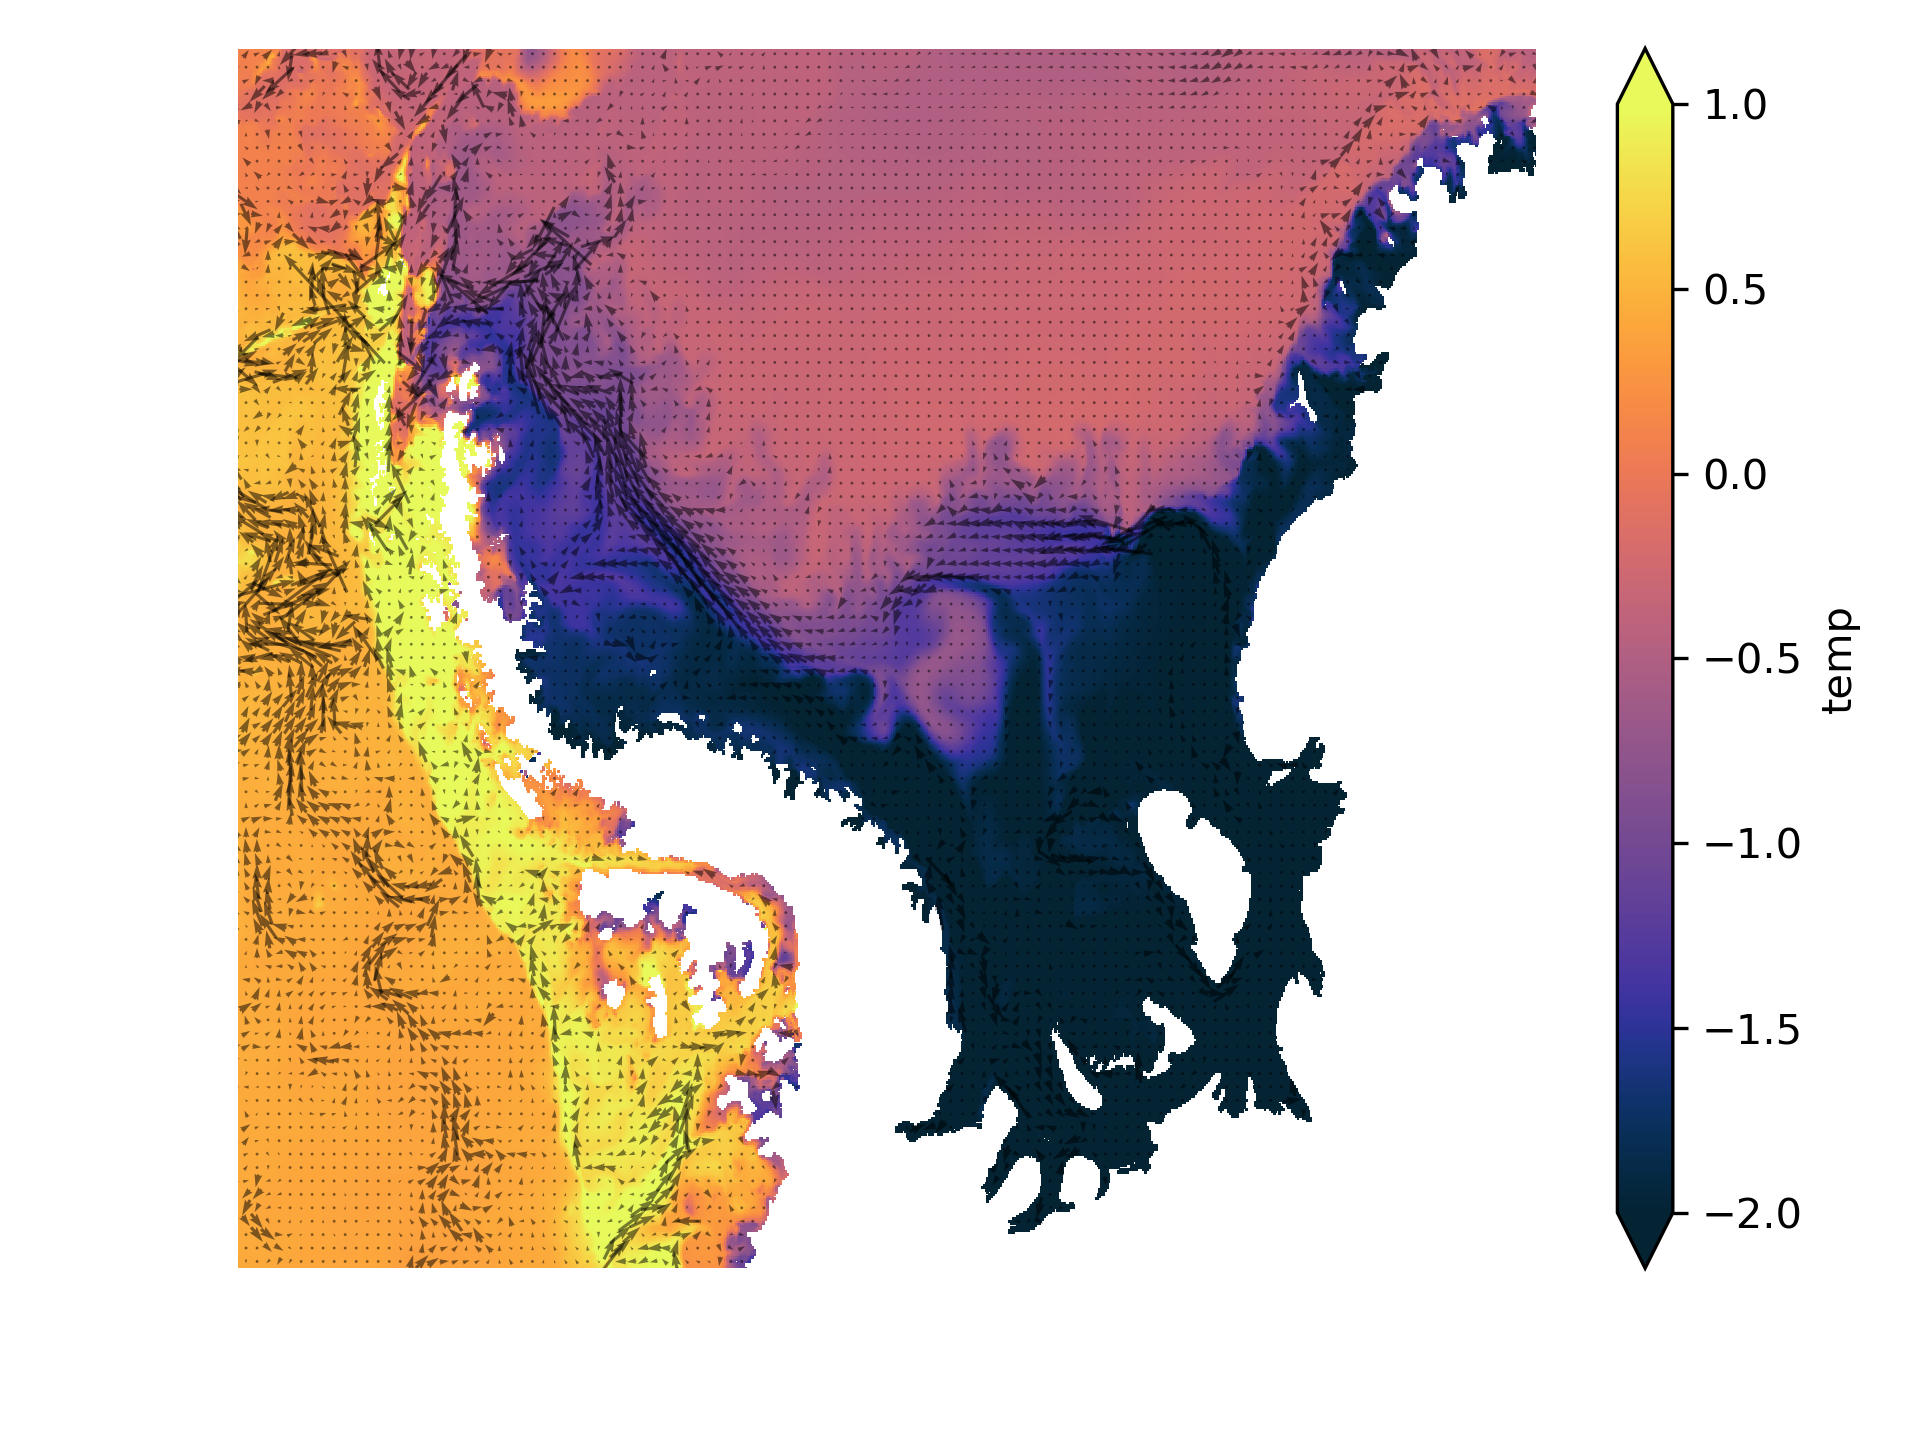

In [42]:
%matplotlib notebook
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)
import xarray as xr
import numpy as np
from features.rotate_vector_roms import rotate_vector_roms
file_path = os.path.join(os.environ.get('rawdir'),'hre4_stable','ocean_avg_0001.nc')
grd_path = os.path.join(os.environ.get('rawdir'),'gdata','hr_exp','waom4_stable_grd.nc')

avg4 = xr.open_dataset(file_path,chunks={'xi_rho':200,'eta_rho':200})
grd4 = xr.open_dataset(grd_path)

angle = np.zeros_like(grd4.lon_rho.values)
u,v = rotate_vector_roms(avg4.u.isel(s_rho=0,ocean_time=-1).values, avg4.v.isel(s_rho=0,ocean_time=-1).values, angle)
oo = (grd4.mask_rho==1)
u[~oo]=np.nan
v[~oo]=np.nan

bl=6

plt.close()
plt.figure(dpi=300)
avg4.temp[-1,0].plot(cmap=ocm.thermal,vmax=1,vmin=-2)
plt.title('')
plt.axis('off')
plt.quiver(np.arange(0,angle.shape[1],bl),np.arange(0,angle.shape[0],bl),u[::bl,::bl],v[::bl,::bl],
                     pivot="mid", color='black',alpha=0.5,scale_units='xy',scale=0.01)
plt.tight_layout()
plt.show()

In [43]:
plt.close()